In [5]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Read the data directly from publicly trades provided by bitmex

data = pd.read_csv("data/bitmex/20220123.csv")
data = data.append(pd.read_csv("data/bitmex/20220124.csv"))
data = data.append(pd.read_csv("data/bitmex/20220125.csv"))

In [7]:
# get only XBTUSD symbol
data = data[data.symbol == 'XBTUSD']

In [8]:
from datetime import datetime
data['timestamp'] = data.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [9]:
import numpy as np
def compute_vwap(df):
    p, q = df['price'], df['foreignNotional']
    vwap = np.sum(p * q) / np.sum(q)
    df['vwap'] = vwap
    return df

data_index = data.set_index(data.timestamp)

In [10]:
data_time_group = data_index.groupby(pd.Grouper(freq='15Min'))

In [11]:
data_time_vwap = data_time_group.apply(compute_vwap)
data_time_vwap

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional,vwap
timestamp,,,,,,,,,,,
2022-01-23 00:00:00.271578,2022-01-23 00:00:00.271578,XBTUSD,Buy,2900,35052.0,ZeroPlusTick,a0aa992a-5c15-a099-9d03-a71aee142835,8273410,0.082734,2900.0,35125.931271
2022-01-23 00:00:00.271578,2022-01-23 00:00:00.271578,XBTUSD,Buy,1900,35052.0,ZeroPlusTick,5e9f715c-1f87-5598-75df-027facf7c08d,5420510,0.054205,1900.0,35125.931271
2022-01-23 00:00:00.271578,2022-01-23 00:00:00.271578,XBTUSD,Buy,5000,35052.0,ZeroPlusTick,1fab656b-b637-632c-e05b-30214d05bab5,14264500,0.142645,5000.0,35125.931271
2022-01-23 00:00:11.543174,2022-01-23 00:00:11.543174,XBTUSD,Sell,1000,35061.0,PlusTick,0a5518ba-8365-99eb-4ba2-ba1a5155311b,2852170,0.028522,1000.0,35125.931271
2022-01-23 00:00:15.534975,2022-01-23 00:00:15.534975,XBTUSD,Buy,100,35061.5,PlusTick,ec28ea49-ac7a-aa29-fd68-6ce0c11ecce3,285213,0.002852,100.0,35125.931271
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-25 23:59:56.454606,2022-01-25 23:59:56.454606,XBTUSD,Buy,7400,36941.5,ZeroPlusTick,25448eb7-49a8-e482-879f-0f5768f2fd6e,20031652,0.200317,7400.0,36954.773975
2022-01-25 23:59:56.454606,2022-01-25 23:59:56.454606,XBTUSD,Buy,7000,36941.5,ZeroPlusTick,505ce106-94fb-e5a0-9a2f-ced139414048,18948860,0.189489,7000.0,36954.773975
2022-01-25 23:59:56.454606,2022-01-25 23:59:56.454606,XBTUSD,Buy,5200,36944.0,PlusTick,e3049a18-daaa-ecdf-7701-aca51d2edc31,14075360,0.140754,5200.0,36954.773975


<AxesSubplot:xlabel='timestamp'>

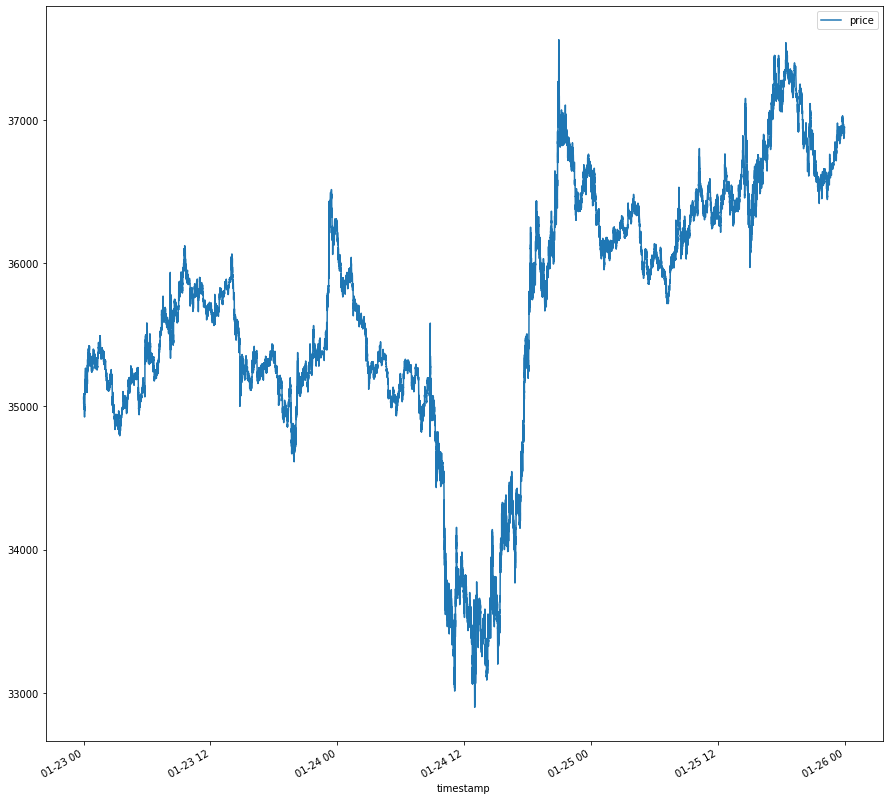

In [12]:
data_time_vwap.plot(x = 'timestamp', y = 'price', figsize=(15, 15))

In [13]:
num_time_bars = len(data_time_group)


In [14]:
# Compute tick bars
num_ticks_per_bar = len(data) / num_time_bars
num_ticks_per_bar = round(num_ticks_per_bar, -3)

data_tick_group = data.reset_index().assign(grpId = lambda row: row.index // num_ticks_per_bar)
data_tick_vwap = data_tick_group.groupby('grpId').apply(compute_vwap)
data_tick_vwap.set_index('timestamp', inplace=True)

data_tick_vwap.drop('index', axis=1, inplace=True)
data_tick_vwap.drop('grpId', axis=1, inplace=True)

data_tick_vwap = data_tick_vwap.reset_index().set_index('timestamp', drop=False)


In [15]:
data_tick_vwap.columns

Index(['timestamp', 'symbol', 'side', 'size', 'price', 'tickDirection',
       'trdMatchID', 'grossValue', 'homeNotional', 'foreignNotional', 'vwap'],
      dtype='object')

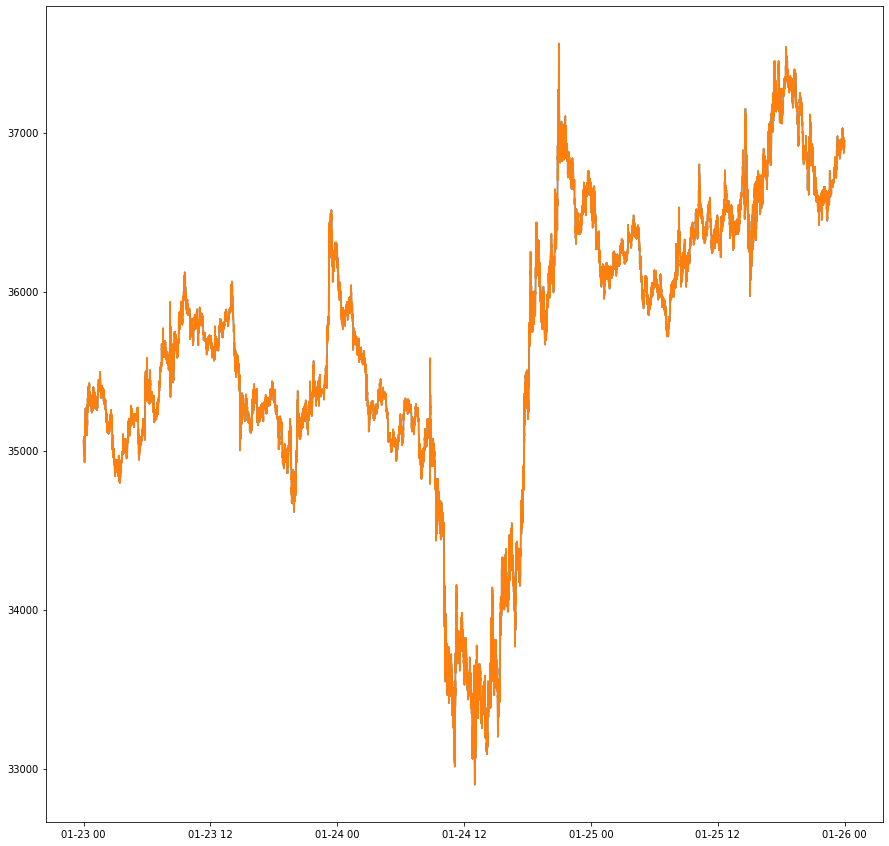

In [16]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,15))
plt.plot(data_time_vwap['timestamp'], data_time_vwap['price'])
plt.plot(data_tick_vwap['timestamp'], data_tick_vwap['price'])
plt.show()

In [17]:
# Check volume bars
data_cm_vol = data.assign(cmVol=data['homeNotional'].cumsum())
total_volume = data_cm_vol.cmVol.values[-1]
vol_per_bar = total_volume // len(data_time_group)
data_vol_group = data_cm_vol.assign(grpId = lambda row: row.cmVol // vol_per_bar)

In [18]:
data_vol_vwap = data_vol_group.groupby('grpId').apply(compute_vwap)

In [19]:
data_vol_vwap.set_index('timestamp', inplace=True)

In [20]:
data_vol_vwap = data_vol_vwap.reset_index().set_index('timestamp', drop=False)

In [21]:
data_vol_vwap

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional,cmVol,grpId,vwap
timestamp,,,,,,,,,,,,,
2022-01-23 00:00:00.271578,2022-01-23 00:00:00.271578,XBTUSD,Buy,2900,35052.0,ZeroPlusTick,a0aa992a-5c15-a099-9d03-a71aee142835,8273410,0.082734,2900.0,0.082734,0.0,35167.939532
2022-01-23 00:00:00.271578,2022-01-23 00:00:00.271578,XBTUSD,Buy,1900,35052.0,ZeroPlusTick,5e9f715c-1f87-5598-75df-027facf7c08d,5420510,0.054205,1900.0,0.136939,0.0,35167.939532
2022-01-23 00:00:00.271578,2022-01-23 00:00:00.271578,XBTUSD,Buy,5000,35052.0,ZeroPlusTick,1fab656b-b637-632c-e05b-30214d05bab5,14264500,0.142645,5000.0,0.279584,0.0,35167.939532
2022-01-23 00:00:11.543174,2022-01-23 00:00:11.543174,XBTUSD,Sell,1000,35061.0,PlusTick,0a5518ba-8365-99eb-4ba2-ba1a5155311b,2852170,0.028522,1000.0,0.308106,0.0,35167.939532
2022-01-23 00:00:15.534975,2022-01-23 00:00:15.534975,XBTUSD,Buy,100,35061.5,PlusTick,ec28ea49-ac7a-aa29-fd68-6ce0c11ecce3,285213,0.002852,100.0,0.310958,0.0,35167.939532
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-25 23:59:56.454606,2022-01-25 23:59:56.454606,XBTUSD,Buy,7400,36941.5,ZeroPlusTick,25448eb7-49a8-e482-879f-0f5768f2fd6e,20031652,0.200317,7400.0,97257.432333,288.0,36926.482536
2022-01-25 23:59:56.454606,2022-01-25 23:59:56.454606,XBTUSD,Buy,7000,36941.5,ZeroPlusTick,505ce106-94fb-e5a0-9a2f-ced139414048,18948860,0.189489,7000.0,97257.621821,288.0,36926.482536
2022-01-25 23:59:56.454606,2022-01-25 23:59:56.454606,XBTUSD,Buy,5200,36944.0,PlusTick,e3049a18-daaa-ecdf-7701-aca51d2edc31,14075360,0.140754,5200.0,97257.762575,288.0,36926.482536


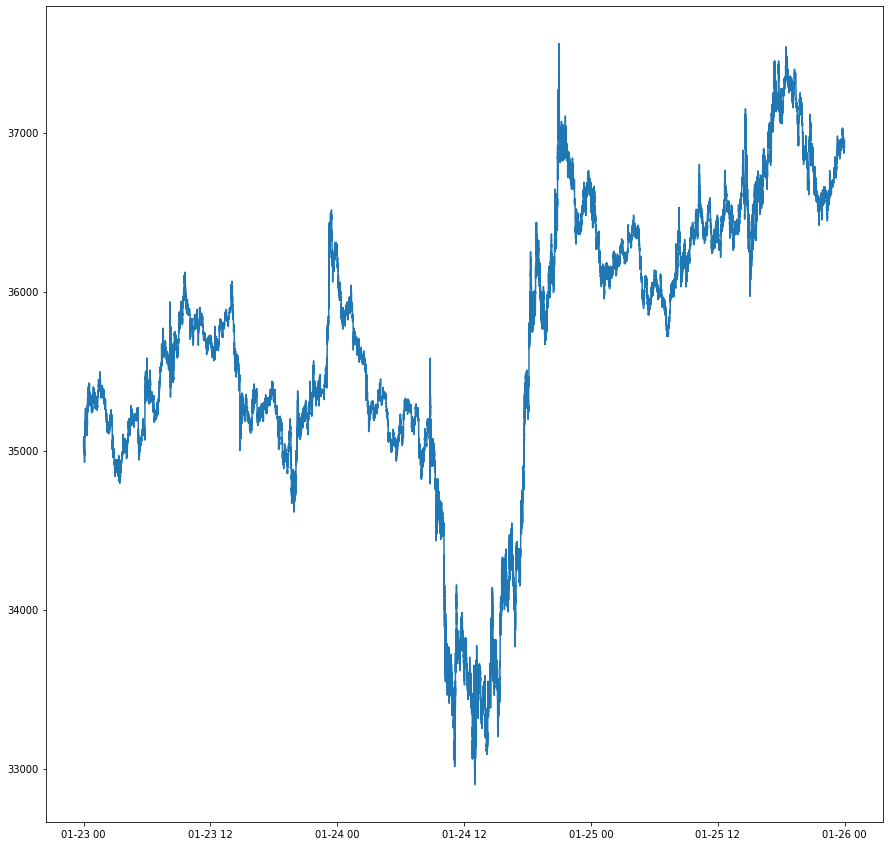

In [22]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,15))
#plt.plot(data_time_vwap['timestamp'], data_time_vwap['price'])
#plt.plot(data_tick_vwap['timestamp'], data_tick_vwap['price'])
plt.plot(data_vol_vwap['timestamp'], data_vol_vwap['price'])
plt.show()

In [24]:
# let's calculate dollar imbalance bars
data_time_idx = data.set_index('timestamp')

def convert_tick_direction(tick_direction):
    if 'Plus' in tick_direction:
        return 1
    else:
        return -1

data_time_idx['tickDirection'] = data_time_idx.tickDirection.map(convert_tick_direction)

In [25]:
# Computing observed imbalance at any point T theta(t) = bt * vt
data_signed_flow = data_time_idx.assign(bv = data_time_idx.tickDirection * data.size)

In [26]:
data_signed_flow

,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional,bv
timestamp,,,,,,,,,,
2022-01-23 00:00:00.271578,XBTUSD,Buy,2900,35052.0,1,a0aa992a-5c15-a099-9d03-a71aee142835,8273410,0.082734,2900.0,6119680
2022-01-23 00:00:00.271578,XBTUSD,Buy,1900,35052.0,1,5e9f715c-1f87-5598-75df-027facf7c08d,5420510,0.054205,1900.0,6119680
2022-01-23 00:00:00.271578,XBTUSD,Buy,5000,35052.0,1,1fab656b-b637-632c-e05b-30214d05bab5,14264500,0.142645,5000.0,6119680
2022-01-23 00:00:11.543174,XBTUSD,Sell,1000,35061.0,1,0a5518ba-8365-99eb-4ba2-ba1a5155311b,2852170,0.028522,1000.0,6119680
2022-01-23 00:00:15.534975,XBTUSD,Buy,100,35061.5,1,ec28ea49-ac7a-aa29-fd68-6ce0c11ecce3,285213,0.002852,100.0,6119680
...,...,...,...,...,...,...,...,...,...,...
2022-01-25 23:59:56.454606,XBTUSD,Buy,7400,36941.5,1,25448eb7-49a8-e482-879f-0f5768f2fd6e,20031652,0.200317,7400.0,6119680
2022-01-25 23:59:56.454606,XBTUSD,Buy,7000,36941.5,1,505ce106-94fb-e5a0-9a2f-ced139414048,18948860,0.189489,7000.0,6119680
2022-01-25 23:59:56.454606,XBTUSD,Buy,5200,36944.0,1,e3049a18-daaa-ecdf-7701-aca51d2edc31,14075360,0.140754,5200.0,6119680


In [66]:
# Implement dollar imbalance bars

# exponential weighted moving average
# We need to calculate x = x(t) + (1-a)*x[t-1) + (1-a)^2 x[t-2] // 1 + (1-a) + (1-a)^2
def ewma(inp, window):
    numerator = 0.0
    decay, denominator = 1, 1
    for t in range(len(inp) - 1, -1, -1):
        numerator += inp[t] * decay
        denominator += decay
        decay = decay * (1 - window)
    result = numerator // denominator
    return result

def _ewma(arr_in, window):
    n = arr_in.shape[0]
    ewma = np.empty(n, dtype=np.float64)
    alpha = 2 / float(window + 1)
    w = 1
    ewma_old = arr_in[0]
    ewma[0] = ewma_old
    for i in range(1, n):
        w += (1-alpha)**i
        ewma_old = ewma_old*(1-alpha) + arr_in[i]
        ewma[i] = ewma_old / w
    return ewma

def compute_dollar_imbalance(bv, et_init, ebv_init):
    et, ebv = et_init, ebv_init
    Ts = []
    cur_theta = bv[0]
    bv_values = bv.values.astype(np.float64)
    i_prev = 0
    n = bv.shape[0]
    abs_thetas = np.zeros(n)
    abs_thetas[0], cur_theta = np.abs(bv_values[0]), bv_values[0]
    for i in range(1, n):
        if i%10000 == 0:
            print("processing step {}".format(i))
        cur_theta += bv_values[i]
        abs_theta = np.abs(cur_theta)
        abs_thetas[i] = abs_theta
        threshold = et * ebv
        #print(abs_theta, threshold)
        if abs_theta >= threshold:
            Ts.append(np.float64(i - i_prev))
            i_prev = i
            et = _ewma(np.array(Ts), window=np.int64(len(Ts)))[-1]
            ebv = np.abs(_ewma(bv_values[:i], window=np.int64(et_init) * 3)[-1])
            print(et, ebv, abs_theta, threshold)
    return Ts, abs_thetas

et_init = 500000 # Eo(T) initial value
ebv_init = np.abs(data_signed_flow.bv.mean())# Eo(bv) initial value

print("size: ", data_signed_flow.shape)
Ts, abs_thetas = compute_dollar_imbalance(data_signed_flow.bv, et_init, ebv_init)

size:  (611968, 10)
processing step 10000
processing step 20000
processing step 30000
processing step 40000
processing step 50000
processing step 60000
processing step 70000
processing step 80000
processing step 90000
processing step 100000
processing step 110000
processing step 120000
processing step 130000
processing step 140000
processing step 150000
processing step 160000
processing step 170000
processing step 180000
processing step 190000
processing step 200000
processing step 210000
processing step 220000
processing step 230000
processing step 240000
processing step 250000
processing step 260000
processing step 270000
processing step 280000
processing step 290000
processing step 300000
processing step 310000
processing step 320000
processing step 330000
processing step 340000
processing step 350000
processing step 360000
processing step 370000
processing step 380000
processing step 390000
processing step 400000
processing step 410000
processing step 420000
processing step 430000


KeyboardInterrupt: 

100000